In [1]:
from IPython.core.display import HTML
import numpy as np
import sys
sys.path.append('/public4/home/sc57082/local')
import glio 
import matplotlib.pyplot as plt
HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

In [15]:
petar_path = '/public4/home/sc57082/GC/petar_data/data.1200.s'

with open(petar_path, 'r') as file:
    # 逐行读取文件
    first_row = file.readline().strip().split()
first_row = np.array(first_row, dtype=float)
data = np.loadtxt(petar_path, skiprows=1)

unit = 0.9777922

m = data[:,0]
pos = data[:,1:4] + first_row[1:4]
vel = data[:,4:] + first_row[4:]
#bool1= (pos[:,0]<-5000)&(pos[:,0]>-10000)&(pos[:,2]<0)&(pos[:,2]>-10000)
bool1 = pos[:,0]<2000000
print(pos[:,0])

m1= m[bool1] 

[-312082.23611094  -46264.60019814 -550881.30716359 ...    2238.64011058
    2241.31836894    2239.44372582]


[4.5e-11 4.5e-11 4.5e-11 ... 4.5e-11 4.5e-11 4.5e-11]


(-20.0, 20.0)

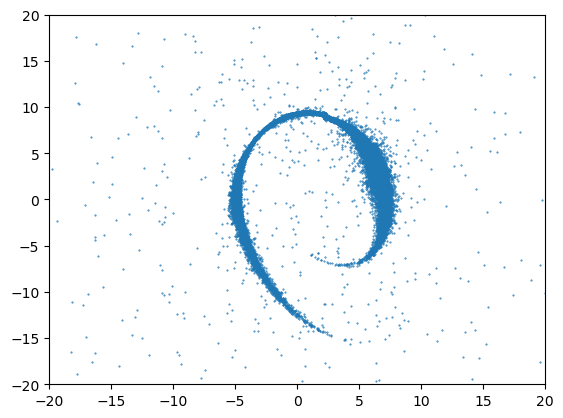

In [16]:
unit = 0.9777922
ic_pos = pos[bool1,:]/1e3
ic_vel = vel[bool1,:]*unit
ic_m = np.full(m1.shape,0.45)/1e10
print(ic_m)
plt.scatter(ic_pos[:,0],ic_pos[:,2],s=0.2)
plt.xlim(-20,20)
plt.ylim(-20,20)

In [26]:
npart1 = len(ic_m)
s = glio.GadgetSnapshot(None)
s.header.npart = np.array([0,npart1, 0, 0, 0, 0]).astype('int')
s.header.num_files = np.array([1]).astype('int')
s.pos[1]  = np.r_[ic_pos].astype('float32')
s.vel[1]  = np.r_[ic_vel].astype('float32')
s.mass[1] = np.r_[ic_m].astype('float32')
s.ID[1]   = np.arange(npart1).astype('uint32')  +1
#s.save('/public4/home/sc57082/GC/ICs/petar_test/test_1.txt')


/public4/home/sc57082/local/glio/snapshot.py:86: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.array(values, dtype=dtype)


In [69]:
32/1e5*0.44**0.5

0.0002122639865827456